## Problem Description

Sentiment prediction
====================
 * You have recently started hotel business and collected customer sentiments data from different sources which have similar type of business (train).

* Currently customers are visiting your hotel and started dropping their reviews about your hotel and you have collected all the reviews up to data and you are clueless if those reviews represent positive or negative emotions (test).

Use case
========

* You would need to build a system to predict if the reviews are positive/negative, so that you can address any issues which are in the form of negative feedback.


## Importing Libraries

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Reading Dataset

In [2]:
#reading dataset 
df=pd.read_csv('C:/Users/HP/Desktop/Train.csv')
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


## Statistical Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


> From here we can observe that every feature is in object format.

## Data Visualization 


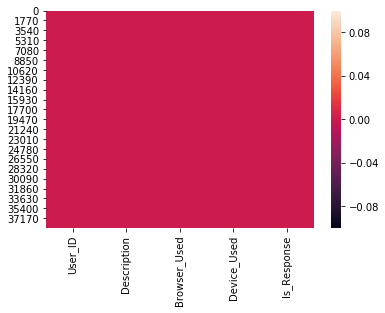

In [4]:
import seaborn as sns
sns.heatmap(df.isnull())

Here we can observe that data looks like pefect .There is no missing data.

[]

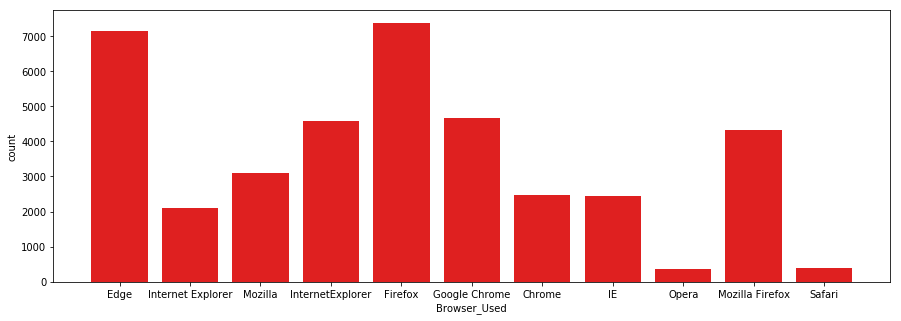

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Browser_Used',color='red')
plt.plot()

* Most of customers to give feedback they had been used Firefox  7367 peoples and Microsoft edge  7134 people's mostly used compare to all other browsers.
* In very few peoples in the sense only 362 customers had been used operamini to give feedback .


[]

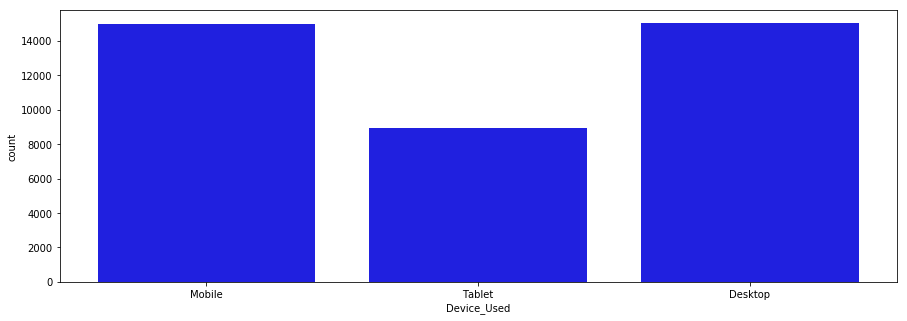

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Device_Used',color='blue')
plt.plot()

* From here we can observe one thing most of the customers who gave feedback they mostly used Desktop compare Mobile and Tablet .

[]

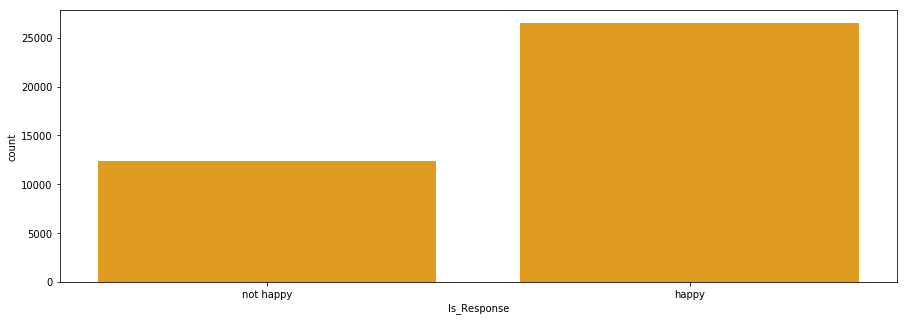

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Is_Response',color='orange')
plt.plot()

> 26.521k people's are happy with restaruant food and some other features in restraunt ,Only 12.411 k People's are not happy with Restraunt food .

## Data Cleansing 

In [8]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


From here User_ID does't important so i'm going to drop this feature .

In [9]:
df.drop("User_ID",axis=1,inplace=True)

In [10]:
# let's check data once
df.head()

,Description,Browser_Used,Device_Used,Is_Response
0,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [11]:
# converting to lower case 
for column in df.columns:
    df['Description'] = df['Description'].str.lower()

In [12]:
df.head()

,Description,Browser_Used,Device_Used,Is_Response
0,the room was kind of clean but had a very stro...,Edge,Mobile,not happy
1,i stayed at the crown plaza april -- - april -...,Internet Explorer,Mobile,not happy
2,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy
3,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy


In [13]:
#removing Punctuation from text 
df['punc_remove'] = df['Description'].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))

In [14]:
df.head()

,Description,Browser_Used,Device_Used,Is_Response,punc_remove
0,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...
1,i stayed at the crown plaza april -- - april -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...
2,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...
3,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...
4,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...


In [15]:
# removing stopwords 
stop = stopwords.words('english')

In [16]:
df['Cleaned_Text'] = df['punc_remove'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
df.head()

,Description,Browser_Used,Device_Used,Is_Response,punc_remove,Cleaned_Text
0,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...,room kind clean strong smell dogs generally av...
1,i stayed at the crown plaza april -- - april -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april april th...,stayed crown plaza april april staff friendly ...
2,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...,booked hotel hotwire lowest price could find g...
3,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...,stayed husband sons way alaska cruise loved ho...
4,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...,girlfriends stayed celebrate th birthdays plan...


Now look's perfect and going to drop punc_remove and Description columns from data set .

In [18]:
#droping columns
df.drop(["Description","punc_remove"],axis=1,inplace=True)

In [19]:
#checking data once 
df.head()

,Browser_Used,Device_Used,Is_Response,Cleaned_Text
0,Edge,Mobile,not happy,room kind clean strong smell dogs generally av...
1,Internet Explorer,Mobile,not happy,stayed crown plaza april april staff friendly ...
2,Mozilla,Tablet,not happy,booked hotel hotwire lowest price could find g...
3,InternetExplorer,Desktop,happy,stayed husband sons way alaska cruise loved ho...
4,Edge,Tablet,not happy,girlfriends stayed celebrate th birthdays plan...


In [20]:
l1 = ['Browser_Used','Device_Used','Is_Response']
le = LabelEncoder()
for i in l1:
    df[i] = le.fit_transform(df[i]).astype(str)

In [21]:
df.head()

,Browser_Used,Device_Used,Is_Response,Cleaned_Text
0,1,1,1,room kind clean strong smell dogs generally av...
1,5,1,1,stayed crown plaza april april staff friendly ...
2,7,2,1,booked hotel hotwire lowest price could find g...
3,6,0,0,stayed husband sons way alaska cruise loved ho...
4,1,2,1,girlfriends stayed celebrate th birthdays plan...


## Building a model

## Splitting  Data set

In [22]:
X = df.Cleaned_Text
Y = df.Is_Response

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

## Logistic Regression

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer()
clf = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [24]:
model = Pipeline([('vectorizer',tvec),('classifier',clf)])

model.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2490,  263],
       [ 163,  978]], dtype=int64)

In [25]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8906009244992296
Precision :  0.8944654850245268
Recall :  0.8906009244992296


## KNeighborsClassifier

In [26]:
clf2 = KNeighborsClassifier()
model_2 = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model_2.fit(X_train,Y_train)


y_pred = model_2.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2482,  641],
       [ 171,  600]], dtype=int64)

In [27]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.7914740626605034
Precision :  0.8460374661776601
Recall :  0.7914740626605034


## AdaBoostClassifier

In [28]:
clf3 = AdaBoostClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',clf3)])
model_3.fit(X_train,Y_train)


y_pred = model_3.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2418,  415],
       [ 235,  826]], dtype=int64)

In [29]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8330765279917822
Precision :  0.8444399533457152
Recall :  0.8330765279917822


## ExtraTreesClassifier

In [30]:
clf4 = ExtraTreesClassifier()
model_4 = Pipeline([('vectorizer',tvec),('classifier',clf4)])
model_4.fit(X_train,Y_train)


y_pred = model_4.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2601,  601],
       [  52,  640]], dtype=int64)

In [31]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8323061119671289
Precision :  0.8978204521825943
Recall :  0.8323061119671289


## Naive Bayes

In [33]:
clf5 = MultinomialNB()
model_5 = Pipeline([('vectorizer',tvec),('classifier',clf5)])
model_5.fit(X_train,Y_train)


y_pred = model_5.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2639,  790],
       [  14,  451]], dtype=int64)

In [34]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.7935285053929122
Precision :  0.9193358325546466
Recall :  0.7935285053929122


## Gradient Boosting Classifier

In [35]:

clf6 = GradientBoostingClassifier()
model_6= Pipeline([('vectorizer',tvec),('classifier',clf6)])
model_6.fit(X_train,Y_train)


y_pred = model_6.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2548,  534],
       [ 105,  707]], dtype=int64)

In [36]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8359013867488444
Precision :  0.8789468446571161
Recall :  0.8359013867488444


## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf7 = RFC(random_state=42)

In [38]:
model_7 = Pipeline([('vectorizer',tvec),('classifier',clf7)])

model_7.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model_7.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2601,  600],
       [  52,  641]], dtype=int64)

In [39]:

print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.83256291730868
Precision :  0.8978445236297984
Recall :  0.83256291730868


* Compare to all other models Logistic regression works well with 90 % accuracy .And flase values also very low compare to other models .

## Testing Model

In [64]:
result=model.predict(['I am very disappointed by the hotel'])
result

array(['1'], dtype=object)

From here 1 is Un-happy and 0 is Happy 

In [65]:
result=model.predict(['I am very happy with restraunt food'])
result

array(['0'], dtype=object)

In [66]:
result=model.predict(['bad restraunt'])
result

array(['1'], dtype=object)

In [67]:
result=model.predict(['best restraunt'])
result

array(['0'], dtype=object)

Here we can observe one thing " model working well.

# ***************DONE ANALYSING SENTIMENT FROM THEIR REVIEWS WEATHER REVIEW IS POSITIVE OR NEGATIVE **************